<a href="https://colab.research.google.com/github/EdenShaveet/Disclosure-Curriculum/blob/main/Module1_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Exercise: Create a Simple KNN Classifier

---


**Script Description:** Generates a KNN classifier based on the Wisconsin Breast Cancer (Diagnostic) Dataset

**Dataset Description:** The  [Wisconsin-Breast Cancer (Diagnostic) dataset (WBC)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) is a classification dataset sourced from the University of California Urvine Machine Learning Repository. The dataset includes relevant measurements relating to breast cancer cases, including whether a mass was benign and malignant.

**Script Attributions:** This script was developed for the Machine Learning Model & Dataset Disclosure for Healthcare & Public Health Contexts (MDSD4Health) Curriculum.

**Instructions:** Read each text block and run each corresponding code block to generate a simple K-Nearest Neighbors (KNN) classifier for the Wisconsin Breast Cancer (Diagnostic) Dataset. For help with Python and Colab, see the Python Help page at the MDSD4Health curriculum website.

# Package Management

First, let's import necessary packages. **Packages** are discrete software programs, often comprised of several modules (containing several classes, functions, variables, etc.), that "run" within Python. 

For more information about packages and modules in Python, see this [post](https://pythongeeks.org/python-modules-vs-packages/#:~:text=The%20following%20are%20some%20of%20the%20distinctions%20between,import%20all%20modules%20in%20a%20package%20at%20once.) on [Python Geeks](https://pythongeeks.org/)

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# View Dataset

Next, we'll import our dataset using the `load_breast_cancer()` function and view a preview of the dataframe. Take a look at the variables contained in this dataset.

In [10]:
df = load_breast_cancer(as_frame=True) # Imports dataset as dataframe and assigns to object "df"
df.frame # Returns dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


Our "target" variable (our label of interest) is whether a breast mass was benign (1) or malignant (0). Let's take a look at the number of benign and malignant masses descriptively and as a plot.

In [11]:
df['target'].value_counts() # Returns count of target variable classes

1    357
0    212
Name: target, dtype: int64

**Output Explanation:** This tabular output shows the raw frequencies of benign (357) and malignant (212) cases in our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


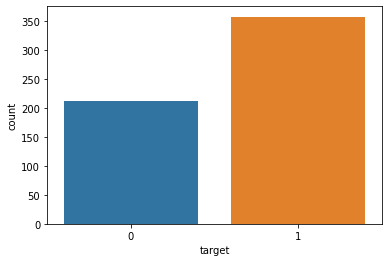

In [12]:
sns.countplot(df['target']) # Generates plot of target variable classes

**Output Explanation:** This plot shows the raw frequencies of benign and malignant cases in our dataset as a bar chart.

# Data Splitting

Before creating and training a model, we need to split our dataset into training and test subsets. We do this by assigning our indicator variables to object "X" and our target variable to object "y," then splitting each into random train and test subsets using `train_test_split`



In [13]:
X = pd.DataFrame(df.data, columns=df.feature_names) # Assign indicator variables as object "X"
y = pd.Series(df.target) # Assign target variable (diagnosis) as object "y"

X_train, X_test, y_train, y_test = train_test_split(X, y) # Split the dataset into training and testing sets

# Create KNN

Finally, let's use the dataset to create and train a KNN classifier to classify breast masses as benign or malignant.

In [14]:
knn = KNeighborsClassifier(n_neighbors=5) # Create KNN classifier (⬅️✏️Try to experiment with different values of n!)

knn.fit(X_train, y_train) # Train classifier using training sets

y_pred = knn.predict(X_test) # Predict response for test dataset

# Performance Metrics

In [15]:
metrics.confusion_matrix(y_test, y_pred) # Return confusion matrix

array([[56,  8],
       [ 4, 75]])

**Output Explanation:** This output provides our KNN classifier's confusion matrix as an array. Each time we run this classifier on this dataset, our model will perform a bit differently. Therefore, our matrix values will change slightly, even if we don't change the code.

**True Positives (TP)** **False negatives (FN)**

**False positives (FP)** **True negatives (TN)**

See [here](https://www.mdsd4health.com/modules/module-1-concepts-in-machine-learning-health/what-is-machine-learning#h.u1jmhd7atu9q) for a review of confusion matrices.

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # Return classifier's accuracy metric
print("F1 Score:",metrics.f1_score(y_test, y_pred)) # Return classifier's F1 score
print("Precision:",metrics.precision_score(y_test, y_pred)) # Return classifier's precision metric
print("Recall / Sensitivity:",metrics.recall_score(y_test, y_pred)) # Return classifier's recall (or sensitivity) metric

Accuracy: 0.916083916083916
F1 Score: 0.9259259259259259
Precision: 0.9036144578313253
Recall / Sensitivity: 0.9493670886075949


**Output Explanation:** This output provides a few relevant model performance metrics based on our confusion matrix.

Because our confusion matrix values vary slightly at each model execution, our performance metrics vary slightly as well. For this dataset, our model should consistently be perform well (>85%)

See [here](https://www.mdsd4health.com/modules/module-1-concepts-in-machine-learning-health/what-is-machine-learning#h.dr34n7h1xx5h) for a review of confusion-matrix-based performance metrics.

# Assess

Refer to the classification performance metrics information contained in [Module 1.1](https://www.mdsd4health.com/modules/module-1-concepts-in-machine-learning-health/what-is-machine-learning). How did your model perform?